## 05. **Random Variables**
 - Author: Adrian Chirinos
 - Date: 15/08/2025
 - Goal: Learn and practice commin distributions like binomial, poisson, normal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson

El modelo Bernoullie se aplica a una variable aleatoria que puede asumir sólo dos variables. Para este modelo tenemos: 

- $E(X) = p$
- $V(X) = pq$

Donde "$p$" es la probabilidad de éxito y "$q$" es la probabilidad de fracaso. $E(X)$ significa la esperanza de la variable aleatoria $X$ y $V(X)$ significa la varianza de la variable aleatoria $X$

El modelo binomial puede considerarse como la suma de N variables Bernulli independientes una de otra donde se cumpla lo siguiente: 
1. Debe haber un número fijo de pruebas repetidas estadísticamente independientes.
2. Cada prueba debe ser una variables Bernullie, es decir puede resultar en un éxito o un fracaso.
3. Todas las pruebas deben tener idénticas probabilidades de éxito.

El modelo binomial es discreto y tiene lo siguiente: 
- $E(X) = np$
- $V(X) = npq$

Donde "$n$" es el número de ensayos o pruebas, "$p$" es la probabilidad de éxito y "$q$" la probabilidad de fracaso

----

Una moneda es lanzada 10 veces. Cúal es la probabilidad de obtener 8 o más caras ?

In [29]:
n = 10
p = 0.5
# P(X >= 8) = P(X=8) + P(X=9) + P(X=10) = 1 - P(X <= 7) = 1 - binom.cdf(7) 
prop = 1 - binom.cdf(5, n, p) #cfd = es la funcion de distribucion acumulada que indica "P(X = 0) + P(X = 1) + ... + P(X = 7)"

print(f"La probabilidad es {prop:.4f}%")


La probabilidad es 0.3770%


Se sabe que el 90% de los trabajadores de una ciuidad industrial son miembros de un sindicato. En un estudio de a situacion laboral de la ciudad un economista escoge una muestra al azar de 15 obreros para entrevistas. ¿ Cuál es la probabilidad de que la muestra contenga 12 o menos miembros del sindicato ?

In [21]:
p = 0.9
n = 15 
# P(X <= 12) = P(X = 0) + P(X = 1) + ... + P(X = 12)
prop = binom.cdf(12, n, p)
print(f"La probabilidad es {prop:.4f}%")


La probabilidad es 0.1841%


-----------

Muchos experimentos no ocurren como un resultado definido de pruebas si no como puntos de tiempo, espacio o volumen al azar. El modelo poisson es adecuado en estos casos si:

1. El número de ocurrencias del hecho es independiente de una unidad.
2. El valor esperado de la variable es proporcional al tamaño de la unidad especificada.
3. La probabilidad de mas de una ocurrencia del hecho en una unidad especificada muy pequeña es despreciable.

Para este modelo tenemos:
- $E(X) = \lambda$
- $V(X) = \lambda$

Donde $\lambda$ es igual a el número de ocurrencias por unidad especificada, la distribución poisson es discreta. 


-----------

En un call-center ocurren 4 llamadas por minuto( $\lambda = 4$ ). ¿ Cuál es la probabilidad de que no ocurran más de 2 llamadas durante los minutos siguientes ?

In [ ]:
minutos = 2 
plambda = 8 

#P( x<=2 ) = p(X=0) + P(X=1) + P(X=2) = cdf.(2,minutos,plambda)
prop = poisson.cdf(minutos,plambda)
print(f"La probabilidad es {prop:.4f}%")

La probabilidad es 0.0138%


In [ ]:
#P( x >= 4 ) = p(X=4) + P(X=5) + P(X=6) + ... P(X = inf) = 1 - cdf.(2,minutos,plambda)
#P( x >= 4 ) = 1 - P(x<=3) = 1 - P(X=0) - P(X=1) - P(X=2) - P(X=3) 
minutos = 3 #Numeros de exitos (Es 3 porque a partir de 4 en adelante ya son exitos)
plambda = 8 # Ocurrencia en una unidad especificada 4 llamadas por minuto (2 mintos * 4 llamadas = 8 llamadas en dos minutos) 

prop = 1 - poisson.cdf(minutos,plambda)
print(f"La probabilidad es {prop:.4f}%")

La probabilidad es 0.9576%


Un fabricante de tejidos de lana afirma que el promedio de defectos en sus productos es 1 por 2 yardas cuadradas. Se extrajo una yarda cuadrada al azar y tenía 3 defectos. ¿ Cuál es la probabilidad de obtener 3 o más defectos en cualquier yarda cuadrada si la afirmación del fabricante fuera válida ?

In [ ]:
plambda = 0.5 #Ocurrencia en una unidad especificada 1 falla de 2 yardas
n = 3 
# P(X >=3 ) = P(X=3) + P(X=4) + P(X=5) + P(X=6) + ... + P(X=n)
# P(X >=3 ) = 1 - P(X <= 2) = 1 - P(X=0) - P(X=1) - P(X=2) = 1 - poisson.cdf(n,plambda)

prop = 1 - poisson.cdf(n,plambda)
print(f"La probabilidad es {prop:.4f}%")


La probabilidad es 0.0018%


------------

El modelo de probabilidad mas frecuentemente usado en el análisis económico y comercial es la distribución normal, que puede expresarse en la forma general y estandarizada. Se dice que una variable aleatoria $X$ tiene una distribución normal si es continua, si está en el rango $(-inf,inf)$ y si puede expresarse por su media "$\mu$" y su desviación estandar "$\sigma$"

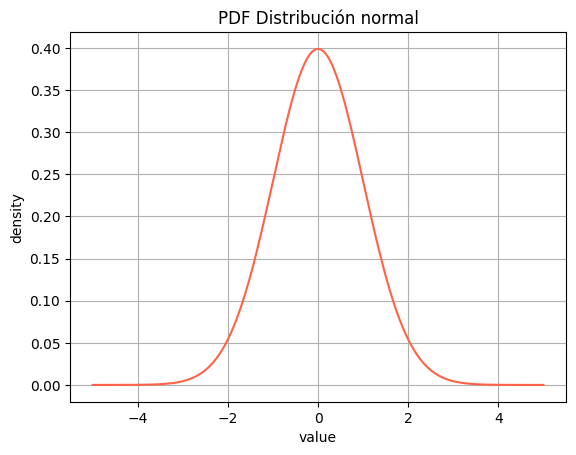

In [45]:
x = np.linspace(-5,5,1000)
pdf = norm.pdf(x)

plt.plot(x, pdf, c = 'tomato')
plt.title("PDF Distribución normal")
plt.xlabel("value")
plt.ylabel("density")
plt.grid(True)
plt.show()

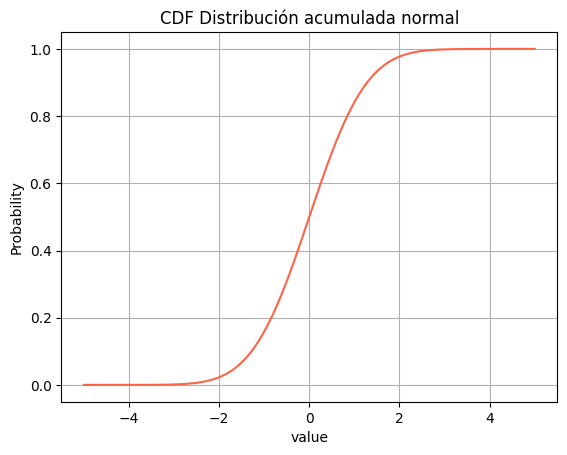

In [51]:
x = np.linspace(-5,5,1000)
cdf = norm.cdf(x)

plt.plot(x, cdf, c = 'tomato')
plt.title("CDF Distribución acumulada normal")
plt.xlabel("value")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

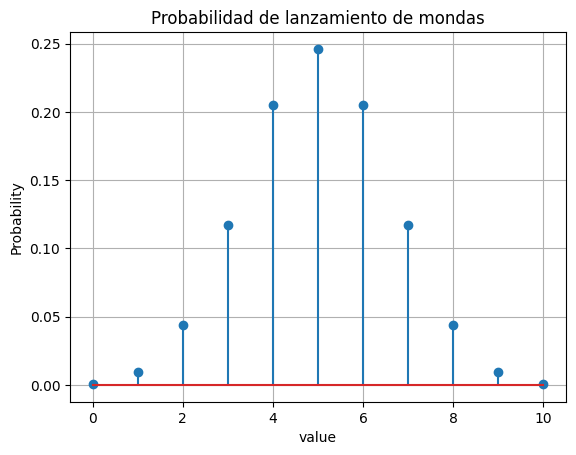

In [ ]:
n = 10
p = 0.5
x = range(n+1)

pmf = binom.pmf(x, n, p)
plt.stem(x, pmf)
plt.title("Probabilidad de lanzamiento de moneda")
plt.xlabel("value")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

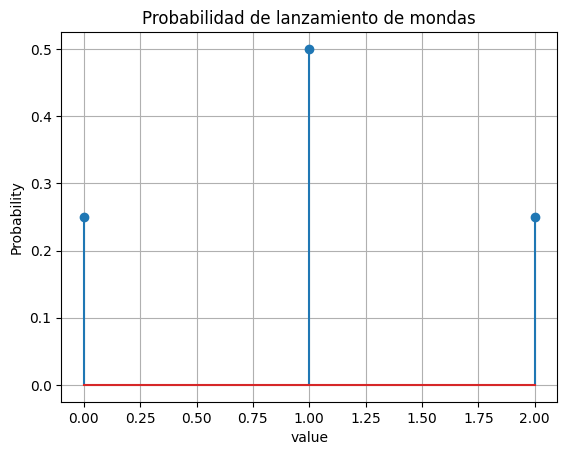

In [ ]:
n = 2
p = 0.5
x = range(n+1)

pmf = binom.pmf(x, n, p)
plt.stem(x, pmf)
plt.title("Probabilidad de lanzamiento de moneda 2 veces")
plt.xlabel("value")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

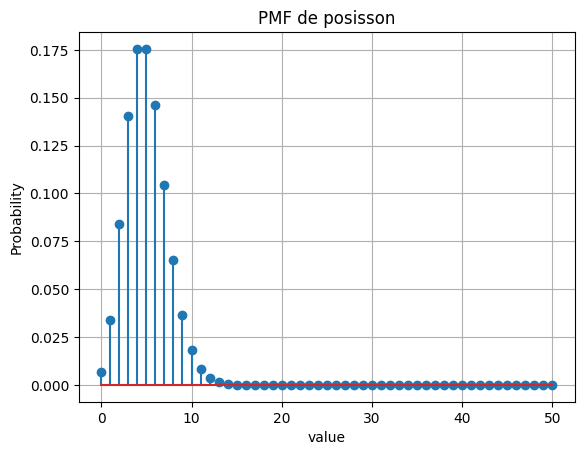

In [64]:
n = 50
plambda = 5 # 5 de 50 
x = range(n+1)

pmf = poisson.pmf(x, plambda)
plt.stem(x, pmf)
plt.title("PMF de posisson")
plt.xlabel("value")
plt.ylabel("Probability")
plt.grid(True)
plt.show()